In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv')
df.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [4]:
df.drop(['url', 'discount_price__currency', 'discount_price__price_string', 'price_detail__currency', 'price_detail__price_string', 'created'], axis=1, inplace=True)

In [5]:
df.drop_duplicates()
df['published_time'] = pd.to_datetime(df['published_time'])

In [6]:
df.head(5)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06 05:16:11+00:00,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23 16:59:49+00:00,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14 23:58:14+00:00,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2016-01-21 01:38:48+00:00,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2016-01-11 21:39:33+00:00,455.0,8640.0


In [7]:
df.shape

(13608, 14)

In [8]:
df.isnull().sum()

id                                 0
title                              0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
published_time                     0
discount_price__amount          1403
price_detail__amount             497
dtype: int64

In [9]:
df['discount_price__amount']=df['discount_price__amount'].fillna(df['discount_price__amount'].median())

In [10]:
df['price_detail__amount']=df['price_detail__amount'].fillna(df['price_detail__amount'].median())

In [11]:
df['is_paid'].value_counts()

True     13112
False      496
Name: is_paid, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


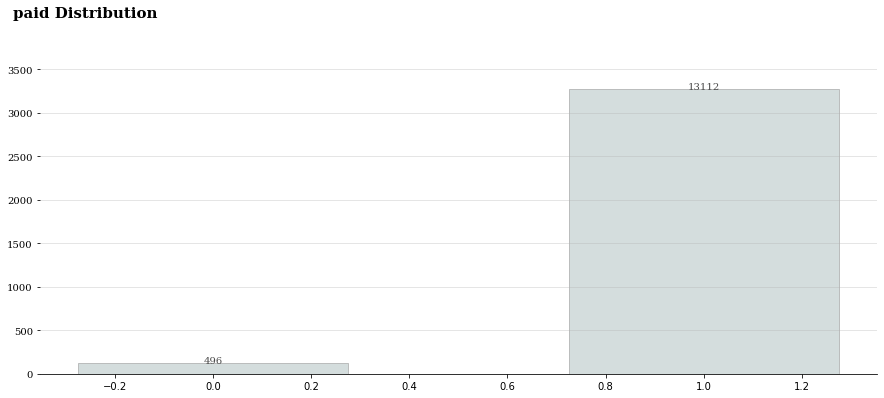

In [12]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
df_q1=df['is_paid'].value_counts()
ax.bar(df_q1.index,df_q1,width=0.55, edgecolor='darkgray', color='#d4dddd',linewidth=0.7)
for i in df_q1.index:
    ax.annotate(f"{df_q1[i]}",xy=(i,df_q1[i]+100), va = 'center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.set_ylim(0, 15000)    
ax.set_yticklabels(np.arange(0, 15000, 500),fontfamily='serif')
fig.text(0.1, 0.95, 'paid Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()


In [13]:
df.head(3)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06 05:16:11+00:00,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23 16:59:49+00:00,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14 23:58:14+00:00,455.0,8640.0


In [14]:
df['num_published_practice_tests'].value_counts()

0    13008
2      214
1      202
6       67
5       43
3       39
4       35
Name: num_published_practice_tests, dtype: int64

In [15]:
df_q2=df.groupby('is_paid')['num_published_practice_tests'].value_counts().unstack().sort_index().fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


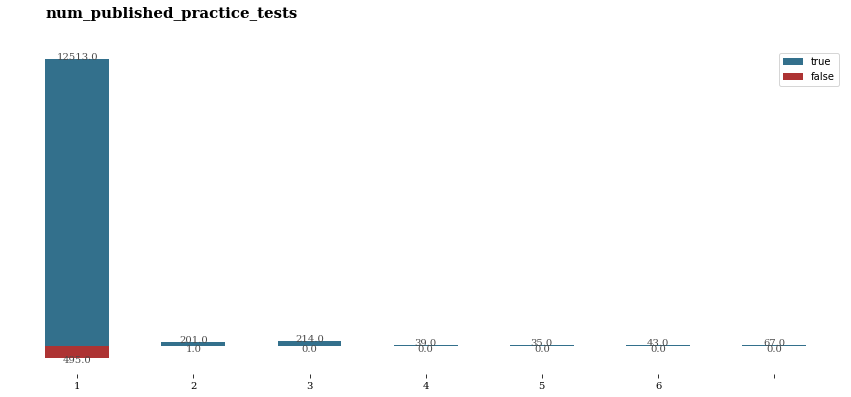

In [16]:
false=-df_q2.loc[0]
true=df_q2.loc[1]
fig,ax=plt.subplots(1,1,figsize=(15,6))
ax.bar(true.index, true, width=0.55, color='#004c70', alpha=0.8, label='true')
ax.bar(false.index, false, width=0.55, color='#990000', alpha=0.8, label='false')
ax.set_ylim(-1200, 13000)
for i in false.index:
    ax.annotate(f"{-false[i]}",xy=(i, false[i] - 100),va = 'center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a')
for i in true.index:
     ax.annotate(f"{true[i]}",xy=(i, true[i] + 100),va = 'center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(df_q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'num_published_practice_tests', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()
    



In [17]:
df_q3=df.groupby('is_paid')['discount_price__amount'].value_counts()[:12].unstack().sort_index().fillna(0)

In [18]:
df_q3

discount_price__amount,455.0,468.0,700.0,3200.0,462.0,481.0,800.0,520.0,474.0,488.0,1600.0
is_paid,,,,,,,,,,,
False,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
True,12317.0,135.0,86.0,61.0,47.0,44.0,39.0,34.0,30.0,27.0,27.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   avg_rating                    13608 non-null  float64            
 5   avg_rating_recent             13608 non-null  float64            
 6   rating                        13608 non-null  float64            
 7   num_reviews                   13608 non-null  int64              
 8   is_wishlisted                 13608 non-null  bool               
 9   num_published_lectures        13608 non-null  int64              
 10  num_published_practice_tests  1360

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


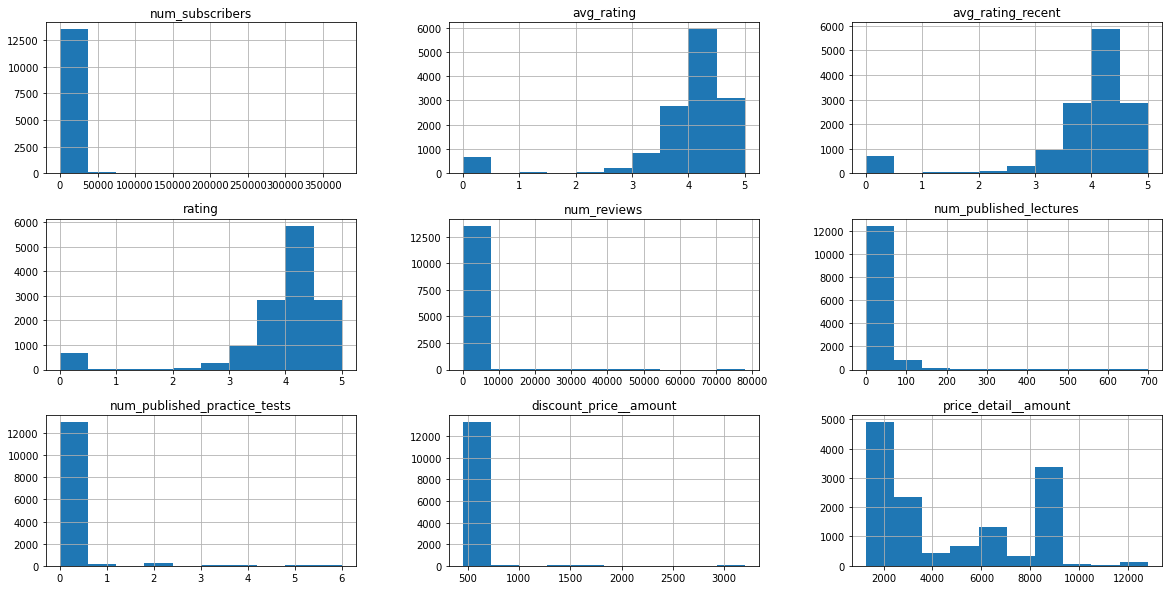

In [20]:
num=['num_subscribers','avg_rating','avg_rating_recent','rating','num_reviews','num_published_lectures','num_published_practice_tests','discount_price__amount','price_detail__amount']
df.loc[:,num].hist(figsize=(20,10))
plt.show()

In [21]:
df.head(2)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06 05:16:11+00:00,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23 16:59:49+00:00,455.0,8640.0


In [22]:
df.drop('is_wishlisted', axis=1, inplace=True)

In [23]:
list(df.select_dtypes(include=['int64','float64']))

['id',
 'num_subscribers',
 'avg_rating',
 'avg_rating_recent',
 'rating',
 'num_reviews',
 'num_published_lectures',
 'num_published_practice_tests',
 'discount_price__amount',
 'price_detail__amount']

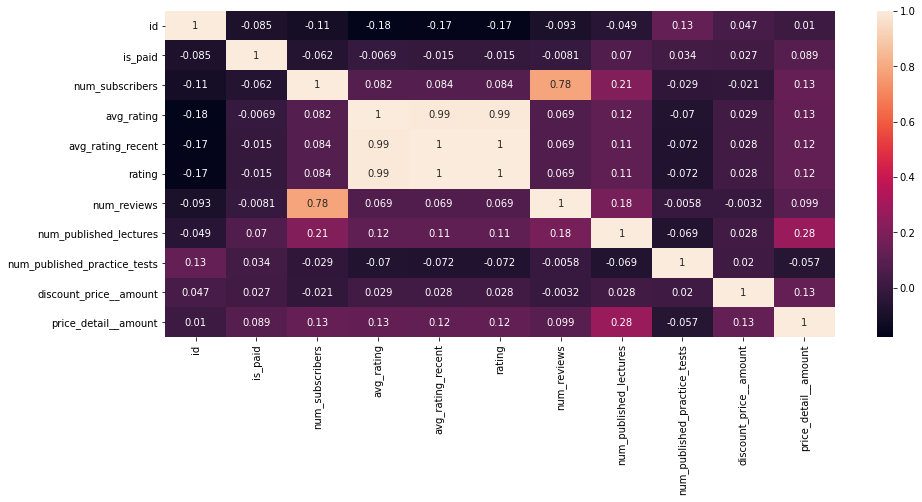

In [24]:
fig=plt.subplots(1,1,figsize=(15,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='num_reviews', ylabel='num_subscribers'>

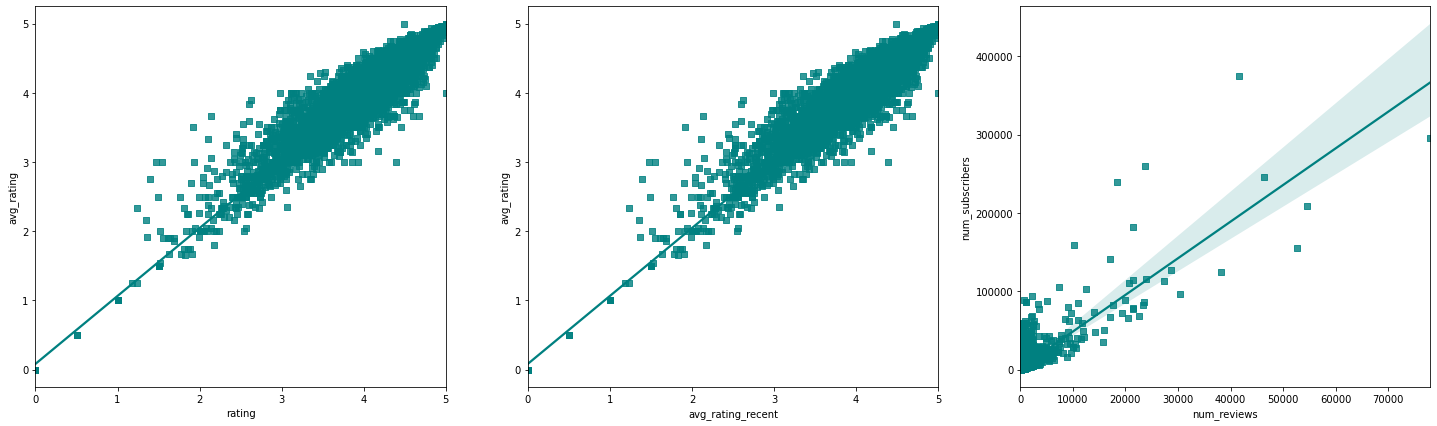

In [25]:
fig, ax = plt.subplots(1,3,figsize=(25,7))
sns.regplot(x='rating', y='avg_rating', data=df, ax=ax[0], marker=',', color='teal')
sns.regplot(x='avg_rating_recent', y='avg_rating', data=df, ax=ax[1], marker=',', color='teal')
sns.regplot(x='num_reviews', y='num_subscribers', data=df, ax=ax[2], marker=',', color='teal')

In [26]:
data=pd.DataFrame(df['published_time']).value_counts()

In [27]:
df['year']=df['published_time'].dt.year
df['month']=df['published_time'].dt.month

In [28]:
df['year'].value_counts()

2018    2698
2020    2689
2019    2521
2017    1883
2015    1431
2016    1269
2014     685
2013     352
2012      70
2011       9
2010       1
Name: year, dtype: int64

In [29]:
false=df[df['is_paid']==False]['year'].value_counts()
false

2020    176
2019     96
2018     94
2017     60
2016     29
2015     16
2013     13
2014     11
2012      1
Name: year, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='year'>

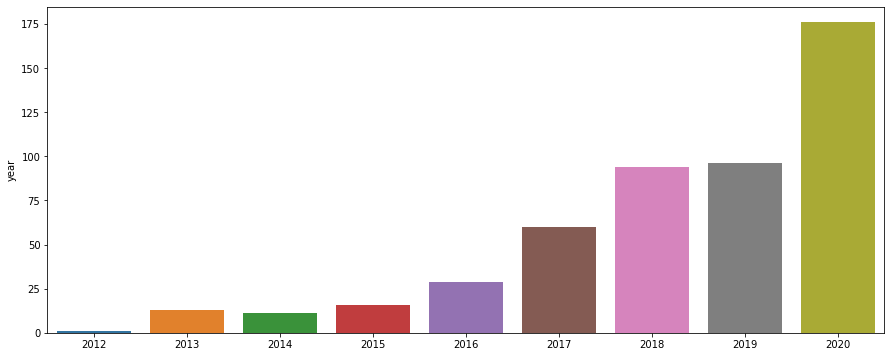

In [30]:
fig=plt.subplots(1,1,figsize=(15,6))
sns.barplot(false.index,false)

In [31]:
true=df[df['is_paid']==True]['year'].value_counts()
true

2018    2604
2020    2513
2019    2425
2017    1823
2015    1415
2016    1240
2014     674
2013     339
2012      69
2011       9
2010       1
Name: year, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='year'>

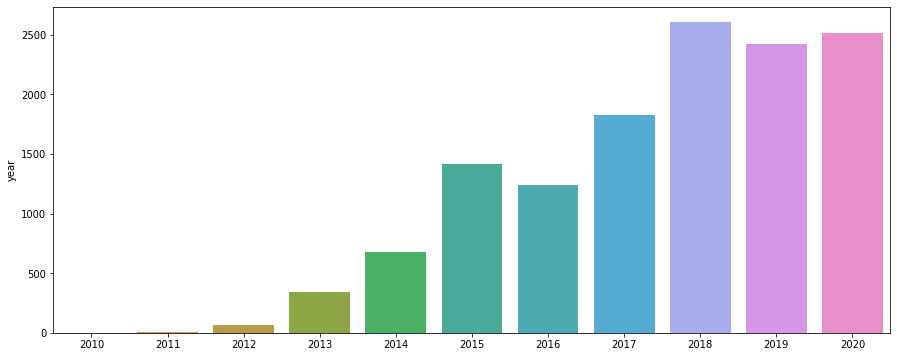

In [32]:
fig=plt.subplots(1,1,figsize=(15,6))
sns.barplot(true.index,true)

In [33]:
df.head(2)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount,year,month
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-04-06 05:16:11+00:00,455.0,8640.0,2016,4
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-23 16:59:49+00:00,455.0,8640.0,2016,8
